In [1]:
##import libraries##
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import os
import pandas as pd
import imagecodecs
import healpy as hp

<IPython.core.display.Javascript object>


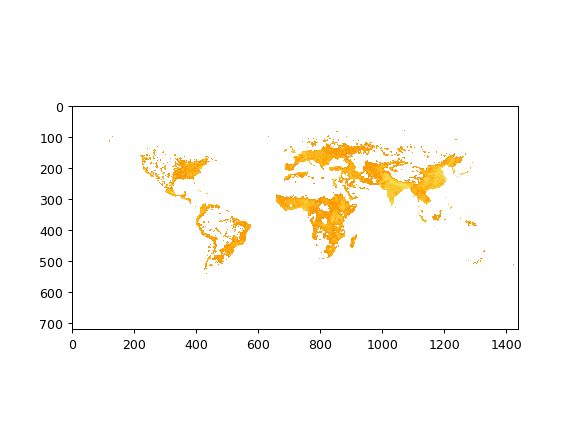

In [2]:
##read the tif file##
%matplotlib notebook
image=tiff.imread('/media/sf_Shared_Ubuntu/MAPS/gpw_v4_population_count_rev11_2020_15_min.tif')
image_array=np.array(image)


plt.imshow(image_array, cmap='inferno',norm='log')

In [10]:
##HEALPix scheme for image array##
#spherical co-ordinates#
theta = np.linspace(0, np.pi, num=image_array.shape[0])[:,None]
phi = np.linspace(-np.pi, np.pi, num=image_array.shape[1])
#set angular resolution#
nside = 16
print("Pixel area: %.2f square degrees" % hp.nside2pixarea(nside, degrees=True))


Pixel area: 13.43 square degrees


In [11]:
##Allocate HEALPix Map to image array##
pix = hp.ang2pix(nside, theta, phi)
healpix_map = np.zeros(hp.nside2npix(nside), dtype=np.double)
healpix_map[pix]=image_array


<IPython.core.display.Javascript object>


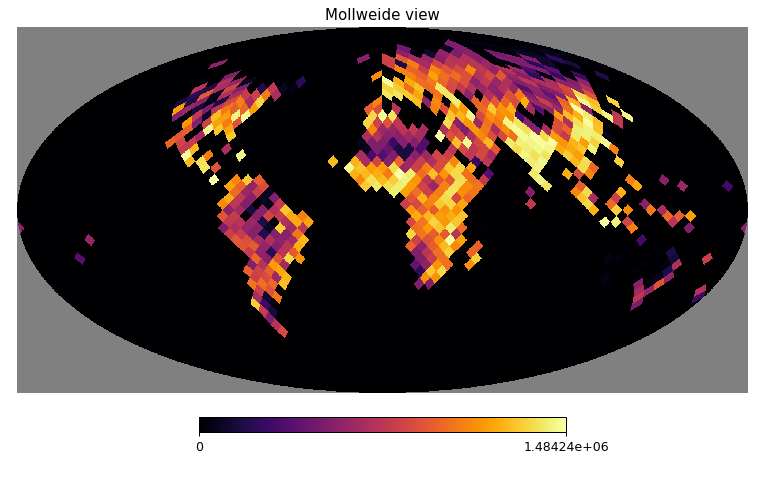

In [12]:
%matplotlib notebook
hp.mollview(healpix_map,cmap="inferno", xsize=2000, flip="geo",norm="hist",min=0)
plt.show()

In [6]:
#check#
pixel_index = hp.ang2pix(nside, 0,3.14)
data_value = healpix_map[pixel_index]
print(data_value)

-3.4028230607370965e+38
